# Physically Hazardous Asteroid Prediction

## Data Cleaning and Normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

### Dataset

In [2]:
#loading dataset, source: https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification
df = pd.read_csv('../nasa.csv')

#checking data shape
print("Number of Datapoints: " + str(df.shape[0]))
print("Number of Features: " + str(df.shape[1]))

Number of Datapoints: 4687
Number of Features: 40


In [3]:
#examining dataset
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [4]:
#checking data for null values
df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [5]:
#examining data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

### Data Preparation

The 'name' and 'Neo Reference ID' columns will likely be dropped as they are used to identify objects but don't necessarily have any bearing on the determination of an asteroid. Along with these, the 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', and 'Equinox' columns will be removed, because these non-numeric data types are difficult to process and are not listed among the determining factors in a PHA.

In [6]:
df.drop(['Neo Reference ID', 'Name', 'Close Approach Date', 'Orbiting Body', 
         'Orbit Determination Date', 'Equinox'], axis=1, inplace=True)

Prediction of Potentially Hazardous Asteroids (PHAs) are complex problems with a number of factors. For the sake of simplicity in this project and for greater control over the model and its features, we will focus on the most vital aspects of determining what asteroids/comets are Near Earth Objects (NEOs) and which of these objects are PHAs.

In [7]:
df.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
        'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Relative Velocity km per hr',
        'Miles per hour', 'Miss Dist.(miles)', 'Miss Dist.(lunar)', 'Miss Dist.(Astronomical)', 'Epoch Date Close Approach',
        'Orbit ID', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Relative Velocity km per sec',
        'Orbit Uncertainity', 'Eccentricity', 'Inclination', 'Asc Node Longitude', 'Perihelion Arg',
        'Perihelion Time', 'Mean Anomaly', 'Mean Motion'], axis=1, inplace=True)

The output label is currently a boolean data type. We will change the output label to a numeric data type.

In [8]:
df['Hazardous'] = df['Hazardous'].astype(int)

#### Final Dataset Shape

In [9]:
#verifying final counts of rows and columns
print("Number of Datapoints: " + str(df.shape[0]))
print("Number of Features: " + str(df.shape[1]))

Number of Datapoints: 4687
Number of Features: 10


### Examining Dataset Features

In [10]:
df.describe()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Miss Dist.(kilometers),Minimum Orbit Intersection,Semi Major Axis,Orbital Period,Perihelion Distance,Aphelion Dist,Hazardous
count,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,22.267865,204.604203,457.508906,3.841347e+07,0.082320,1.400264,635.582076,0.813383,1.987144,0.161084
std,2.890972,369.573402,826.391249,2.181110e+07,0.090300,0.524154,370.954727,0.242059,0.951519,0.367647
min,11.160000,1.010543,2.259644,2.660989e+04,0.000002,0.615920,176.557161,0.080744,0.803765,0.000000
25%,20.100000,33.462237,74.823838,1.995928e+07,0.014585,1.000635,365.605031,0.630834,1.266059,0.000000
50%,21.900000,110.803882,247.765013,3.964771e+07,0.047365,1.240981,504.947292,0.833153,1.618195,0.000000
75%,24.500000,253.837029,567.596853,5.746863e+07,0.123593,1.678364,794.195972,0.997227,2.451171,0.000000
max,32.100000,15579.552413,34836.938254,7.478160e+07,0.477891,5.072008,4172.231343,1.299832,8.983852,1.000000


### Feature Correlation

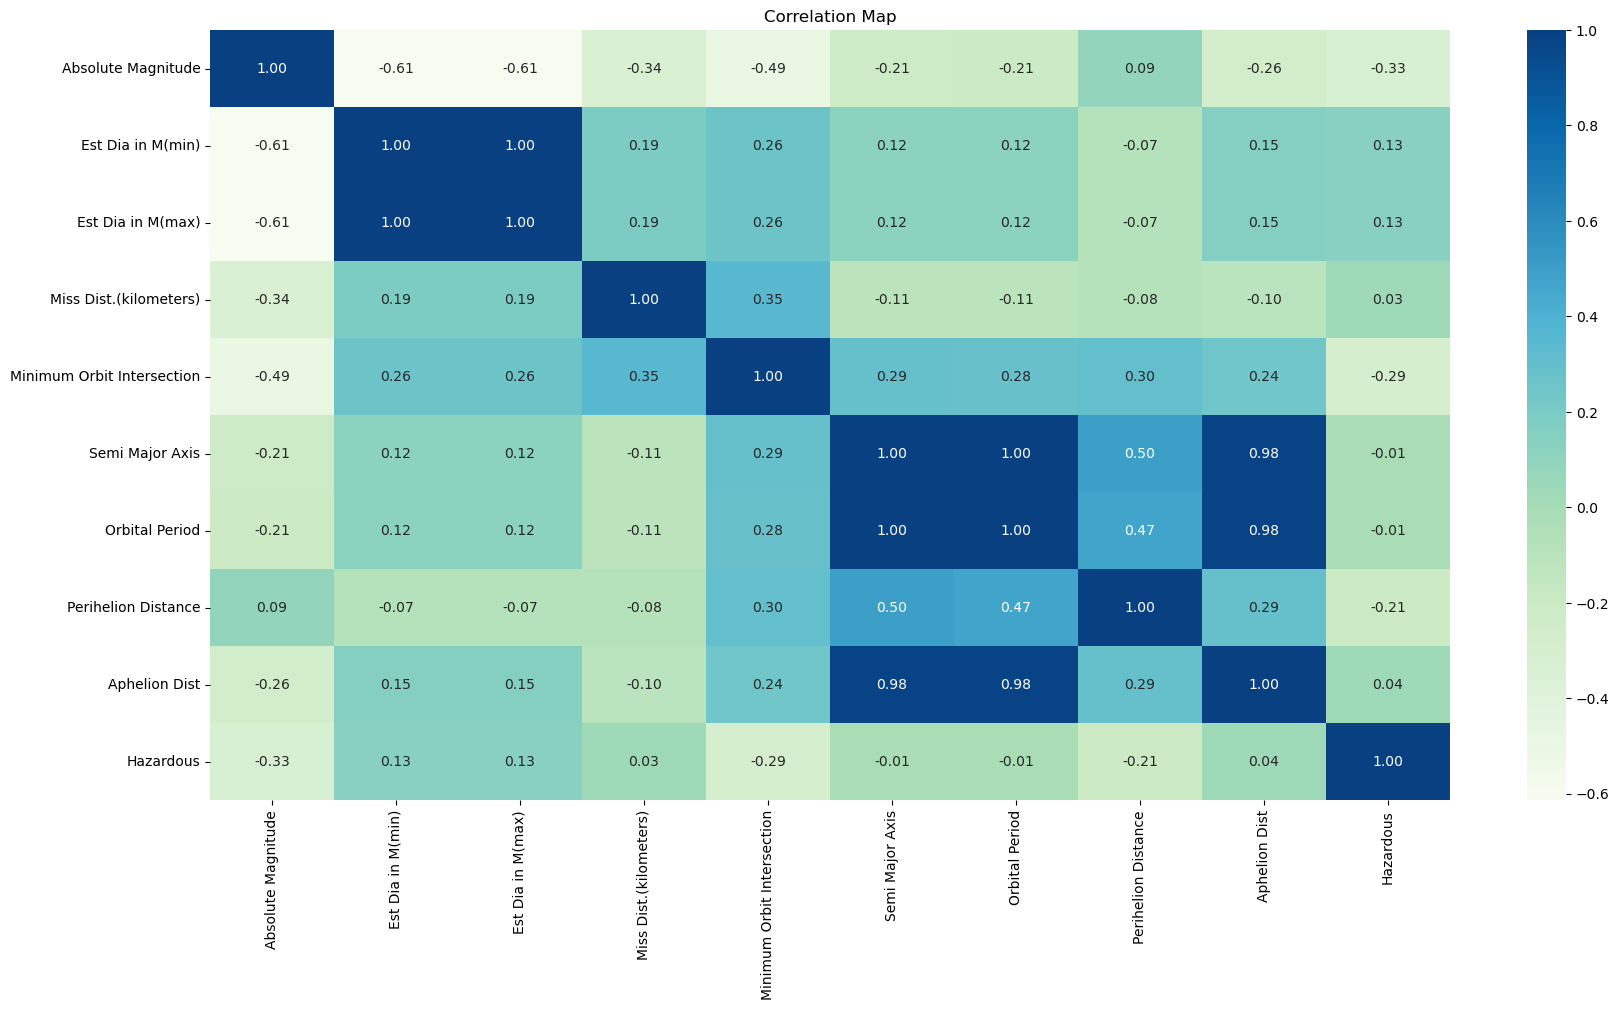

In [11]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), cmap='GnBu', annot=True, fmt='.2f')
plt.title('Correlation Map')
plt.show()

### Distribution of Input Features

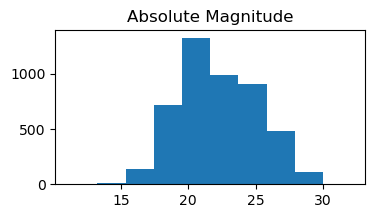

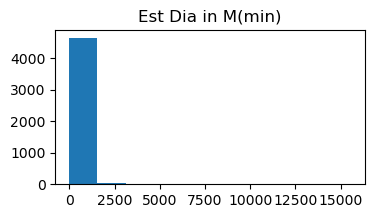

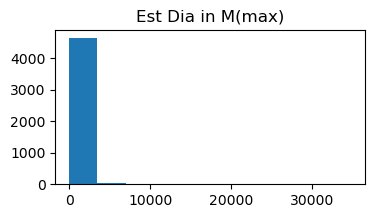

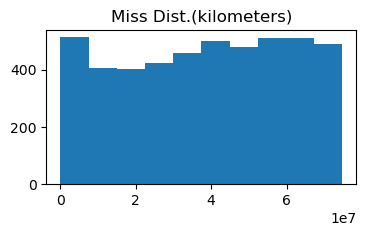

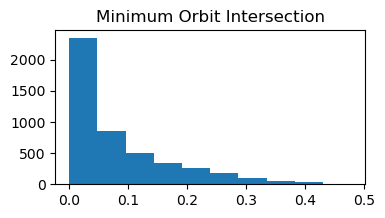

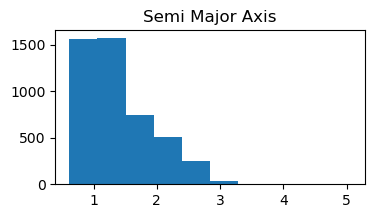

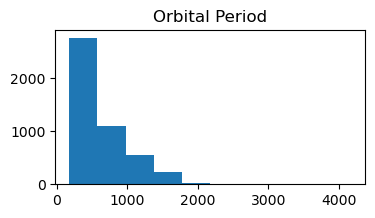

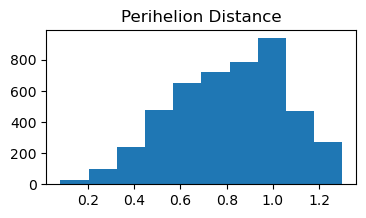

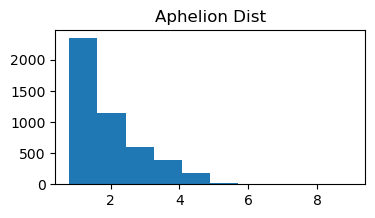

In [12]:
input_features = ['Absolute Magnitude', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Miss Dist.(kilometers)', 
                 'Minimum Orbit Intersection', 'Semi Major Axis', 'Orbital Period', 'Perihelion Distance',
                 'Aphelion Dist']

for feature in input_features:
    plt.figure(figsize = (4,2))
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

### Distribution of Output Label

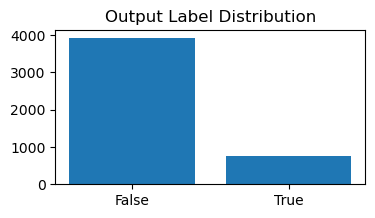

In [13]:
#getting label names and category counts
labels = ['False', 'True']
l_counts = [df['Hazardous'].value_counts()[0], df['Hazardous'].value_counts()[1]]

#plotting distribution of output labels as bar chart
plt.figure(figsize=(4,2))
plt.bar(labels, l_counts)
plt.title('Output Label Distribution')
plt.show()

Output label is skewed with significantly more values of 0 (False) than 1 (true).

### Splitting Data

In [14]:
#shuffle dataset
df = df.sample(frac = 1)

In [15]:
#verifying data shuffled successfully
df.head()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Miss Dist.(kilometers),Minimum Orbit Intersection,Semi Major Axis,Orbital Period,Perihelion Distance,Aphelion Dist,Hazardous
4634,24.0,42.126461,94.197631,2456569.0,0.008859,2.504705,1447.882110,0.883997,4.125412,0
4595,20.5,211.132445,472.106499,33595844.0,0.215054,2.608384,1538.706274,1.215046,4.001722,0
512,20.5,211.132445,472.106499,51708436.0,0.128608,1.340534,566.911122,1.037075,1.643992,0
3936,19.1,402.304580,899.580388,32073156.0,0.193627,2.116163,1124.403342,1.198668,3.033658,0
2205,23.1,63.760979,142.573883,61014648.0,0.004966,1.307690,546.204655,0.994423,1.620956,0


In [16]:
#separate into X and Y for input features and output labels
X = df.drop(['Hazardous'], axis = 'columns')
Y = df['Hazardous']

In [17]:
#data splitting function
def split_set(dataX, dataY, split):
    #get number of rows in the dataset
    rows = dataX.shape[0]
    #test split percentage = 1 - data split (i.e. 20% split means 80% training data)
    test_split = 1 - split
    #get index to split test set at
    test_ind = int(rows * test_split)
    #split the datasets
    XTRAIN = dataX.iloc[0:test_ind]
    XTEST = dataX.iloc[test_ind:]
    YTRAIN = dataY.iloc[0:test_ind]
    YTEST = dataY.iloc[test_ind:]
    #return the X and Y datasets
    return XTRAIN, XTEST, YTRAIN, YTEST

In [18]:
XTRAIN, XTEST, YTRAIN, YTEST = split_set(X, Y, 0.2)

### Data Normalization

#### Data Normalization should be done AFTER data is split into training and testing datasets

In [19]:
# Mean normalization
#normalizing training st
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN_sc = (XTRAIN - mean) / (max - min)

#normalizing testing set
#min = XTEST.min(axis = 0) 
#max = XTEST.max(axis = 0) 
#mean = XTEST.mean(axis = 0)
XTEST_sc = (XTEST - mean) / (max - min)

### Checking Normalized Data

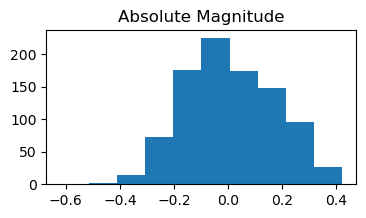

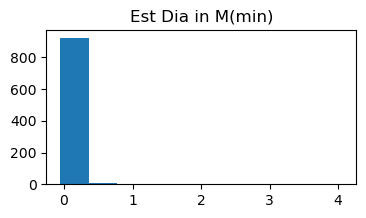

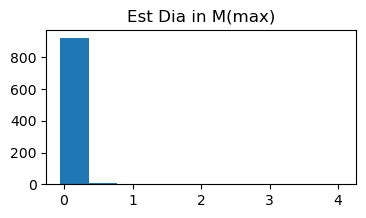

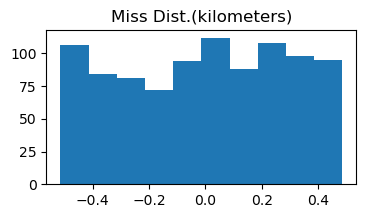

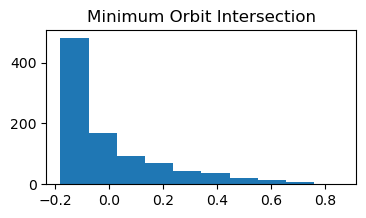

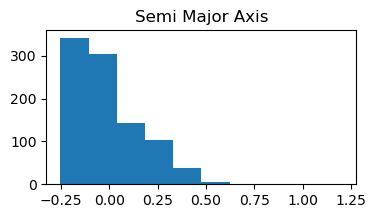

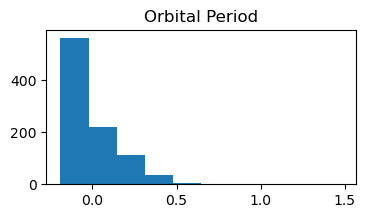

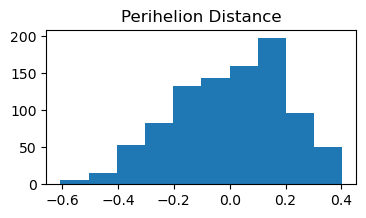

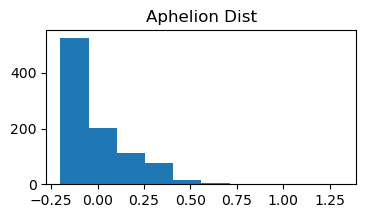

In [20]:
for feature in input_features:
    plt.figure(figsize = (4,2))
    plt.hist(XTEST_sc[feature])
    plt.title(feature)
    plt.show()

### Model Selection and Evaluation

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
#get dimension of x training set
in_dim = X.shape[1]

#### Baseline Models

In [23]:
#baseline model 1
base_model1 = Sequential()
base_model1.add(Dense(10, input_dim = in_dim, activation = 'relu'))
base_model1.add(Dense(1, activation = 'sigmoid'))

#baseline model 2 (1 hidden layer)
base_model2 = Sequential()
base_model2.add(Dense(10, input_dim = in_dim, activation = 'relu'))
base_model2.add(Dense(8, activation = 'relu'))
base_model2.add(Dense(1, activation = 'sigmoid'))

#baseline model 3 (2 hidden layers)
base_model3 = Sequential()
base_model3.add(Dense(10, input_dim = in_dim, activation = 'relu'))
base_model3.add(Dense(8, activation = 'relu'))
base_model3.add(Dense(4, activation = 'relu'))
base_model3.add(Dense(1, activation = 'sigmoid'))

#### Alternative Models - Sigmoid

In [24]:
sigmoid1 = Sequential()
sigmoid1.add(Dense(10, input_dim = in_dim, activation = 'sigmoid'))
sigmoid1.add(Dense(8, activation = 'sigmoid'))
sigmoid1.add(Dense(1, activation = 'sigmoid'))

#### Alternative Models - Other Architectures

In [25]:
#testing other smaller and larger architectures
#smallest nn
small1 = Sequential()
small1.add(Dense(2, input_dim = in_dim, activation = 'relu'))
small1.add(Dense(1, activation = 'sigmoid'))

#larger nn, 4 layer, more neurons
large1 = Sequential()
large1.add(Dense(18, input_dim = in_dim, activation = 'relu'))
large1.add(Dense(8, activation = 'relu'))
large1.add(Dense(4, activation = 'relu'))
large1.add(Dense(1, activation = 'sigmoid'))

#overfitting model
overfit = Sequential()
overfit.add(Dense(256, input_dim = in_dim, activation = 'relu'))
overfit.add(Dense(256, activation = 'relu'))
overfit.add(Dense(256, activation = 'relu'))
overfit.add(Dense(256, activation = 'relu'))
overfit.add(Dense(256, activation = 'relu'))
overfit.add(Dense(1, activation = 'sigmoid'))

#### Model Compile and Training

In [26]:
#compile model
base_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
base_model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
base_model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#sigmoid models
sigmoid1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#alt models
small1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
large1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
overfit.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#model checkpointing and early stopping callbacks
#checkpoint for base model 1
callback_a = ModelCheckpoint(filepath='base_model1.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)
#checkpoint for base model 2
callback_b = ModelCheckpoint(filepath='base_model2.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)
#checkpoint for base model 3
callback_c = ModelCheckpoint(filepath='base_model3.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)

#checkpoint for sigmoid model
callback_d = ModelCheckpoint(filepath='sig1.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)

#checkpoint for alternative models
callback_e = ModelCheckpoint(filepath='small1.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)
callback_f = ModelCheckpoint(filepath='large1.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)
callback_g = ModelCheckpoint(filepath='overfit.hdf5', monitor='val_loss', save_best_only = True, 
                             save_weights_only = True, verbose = 0)
#early stopping callback
callback_x = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

##### Base Model - Training

In [28]:
#fitting model and storing into history variables
history1 = base_model1.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks= [callback_a, callback_x])

In [29]:
history2 = base_model2.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks=[callback_b, callback_x])

Epoch 265: early stopping


In [30]:
history3 = base_model3.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks=[callback_c, callback_x])

Epoch 249: early stopping


##### Sigmoid Model Training

In [31]:
history6 = sigmoid1.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks=[callback_d, callback_x])

KeyboardInterrupt: 

Alternative Model Training

In [ ]:
history7 = small1.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks=[callback_e, callback_x])

In [ ]:
history9 = large1.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks=[callback_f, callback_x])

In [ ]:
history10 = overfit.fit(XTRAIN_sc, YTRAIN, validation_data = (XTEST_sc, YTEST), epochs = 512, batch_size = 128, verbose = 0,
                          callbacks=[callback_g, callback_x])

#### Evaluating Baseline Models

In [ ]:
#loading best weights for baseline models
base_model1.load_weights('base_model1.hdf5')
base_model2.load_weights('base_model2.hdf5')
base_model3.load_weights('base_model3.hdf5')

In [ ]:
#evaluating base models on training sets
P1 = base_model1.predict(XTRAIN_sc)
a1 = base_model1.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
P2 = base_model2.predict(XTRAIN_sc)
a2 = base_model2.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
P3 = base_model3.predict(XTRAIN_sc)
a3 = base_model3.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
#evaluating base models on validation sets
P1 = base_model1.predict(XTEST_sc)
va1 = base_model1.evaluate(XTEST_sc, YTEST)

In [ ]:
P2 = base_model2.predict(XTEST_sc)
va2 = base_model2.evaluate(XTEST_sc, YTEST)

In [ ]:
P3 = base_model3.predict(XTEST_sc)
va3 = base_model3.evaluate(XTEST_sc, YTEST)

#### Evaluating Sigmoid Models

In [ ]:
#load best weights for sigmoid model
sigmoid1.load_weights('sig1.hdf5')

In [ ]:
#evaluating sigmoid models on training sets
P6 = sigmoid1.predict(XTRAIN_sc)
a6 = sigmoid1.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
#evaluating sigmoid models on validation sets
P6 = sigmoid1.predict(XTEST_sc)
va6 = sigmoid1.evaluate(XTEST_sc, YTEST)

#### Evaluating Alternative Models

In [ ]:
#load best weights for other models
small1.load_weights('small1.hdf5')
large1.load_weights('large1.hdf5')
overfit.load_weights('overfit.hdf5')

In [ ]:
#evaluating other models on training sets
P7 = small1.predict(XTRAIN_sc)
a7 = small1.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
#evaluating other models on training sets
P9 = large1.predict(XTRAIN_sc)
a9 = large1.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
#evaluating other models on training sets
P10 = overfit.predict(XTRAIN_sc)
a10 = overfit.evaluate(XTRAIN_sc, YTRAIN)

In [ ]:
#evaluating other models on validation sets
P7 = small1.predict(XTEST_sc)
va7 = small1.evaluate(XTEST_sc, YTEST)

In [ ]:
#evaluating other models on validation sets
P9 = large1.predict(XTEST_sc)
va9 = large1.evaluate(XTEST_sc, YTEST)

In [ ]:
#evaluating other models on validation sets
P10 = overfit.predict(XTEST_sc)
va10 = overfit.evaluate(XTEST_sc, YTEST)

#### Accuracy Comparison

In [ ]:
#putting values into dataframe
data = [['Baseline Model (10-1)', a1[1]*100, va1[1]*100],
       ['Baseline Model (10-8-1)', a2[1]*100, va2[1]*100],
       ['Baseline Model (10-8-4-1)', a3[1]*100, va3[1]*100],
       ['Sigmoid (all neurons)', a6[1]*100, va6[1]*100],
       ['Neural Network (2-1)', a7[1]*100, va7[1]*100],
       ['Neural Network (18-8-4-1)', a9[1]*100, va9[1]*100],
       ['Overfit Model (64-16-8-4-1)', a10[1]*100, va10[1]*100]]
acc_table = pd.DataFrame(data, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
pd.set_option('display.precision', 2)
print(acc_table)

### Learning Curves

#### Baseline Models

In [ ]:
#plotting learning curves for baseline models
plt.figure(figsize=(5, 3))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#baseline model 1 loss
plt.figure(figsize=(5, 3))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#baseline model 2 learning curve
plt.figure(figsize=(5, 3))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#baseline model 2 loss
plt.figure(figsize=(5, 3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#baseline model 3 learning curve
plt.figure(figsize=(5, 3))
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#baseline model 3 loss
plt.figure(figsize=(5, 3))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

##### Sigmoid Model

In [ ]:
#sigmoid model learning curve
plt.figure(figsize=(5, 3))
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#sigmoid model loss
plt.figure(figsize=(5, 3))
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

##### Alternative Models

In [ ]:
#small nn 2-1 learning curve
plt.figure(figsize=(5, 3))
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#small nn 2-1 loss
plt.figure(figsize=(5, 3))
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#large nn 18-8-4-1 learning curve
plt.figure(figsize=(5, 3))
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#large nn 18-8-4-1 loss
plt.figure(figsize=(5, 3))
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#overfit nn learning curve
plt.figure(figsize=(5, 3))
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()

In [ ]:
#overfit nn loss
plt.figure(figsize=(5, 3))
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')
plt.show()